In [1]:
import pandas as pd
import numpy as np

In [5]:
path = '/Users/User/VSCodeFiles/Projects/CaliHousing/archive'
df = pd.read_csv(path+'/housing.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
null = df.total_bedrooms.isnull().sum()
print(null)


207


207 null vs 20,000 rows. Will just remove

In [24]:
df1 = df.dropna().reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
duplicates = df1.duplicated()
print(duplicates.sum())

0


No duplicates

In [38]:
## Need to one hot encode categorical data
pd.unique(df1['ocean_proximity'])

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [36]:
df_dummies = pd.get_dummies(df1,columns=['ocean_proximity'])
df_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

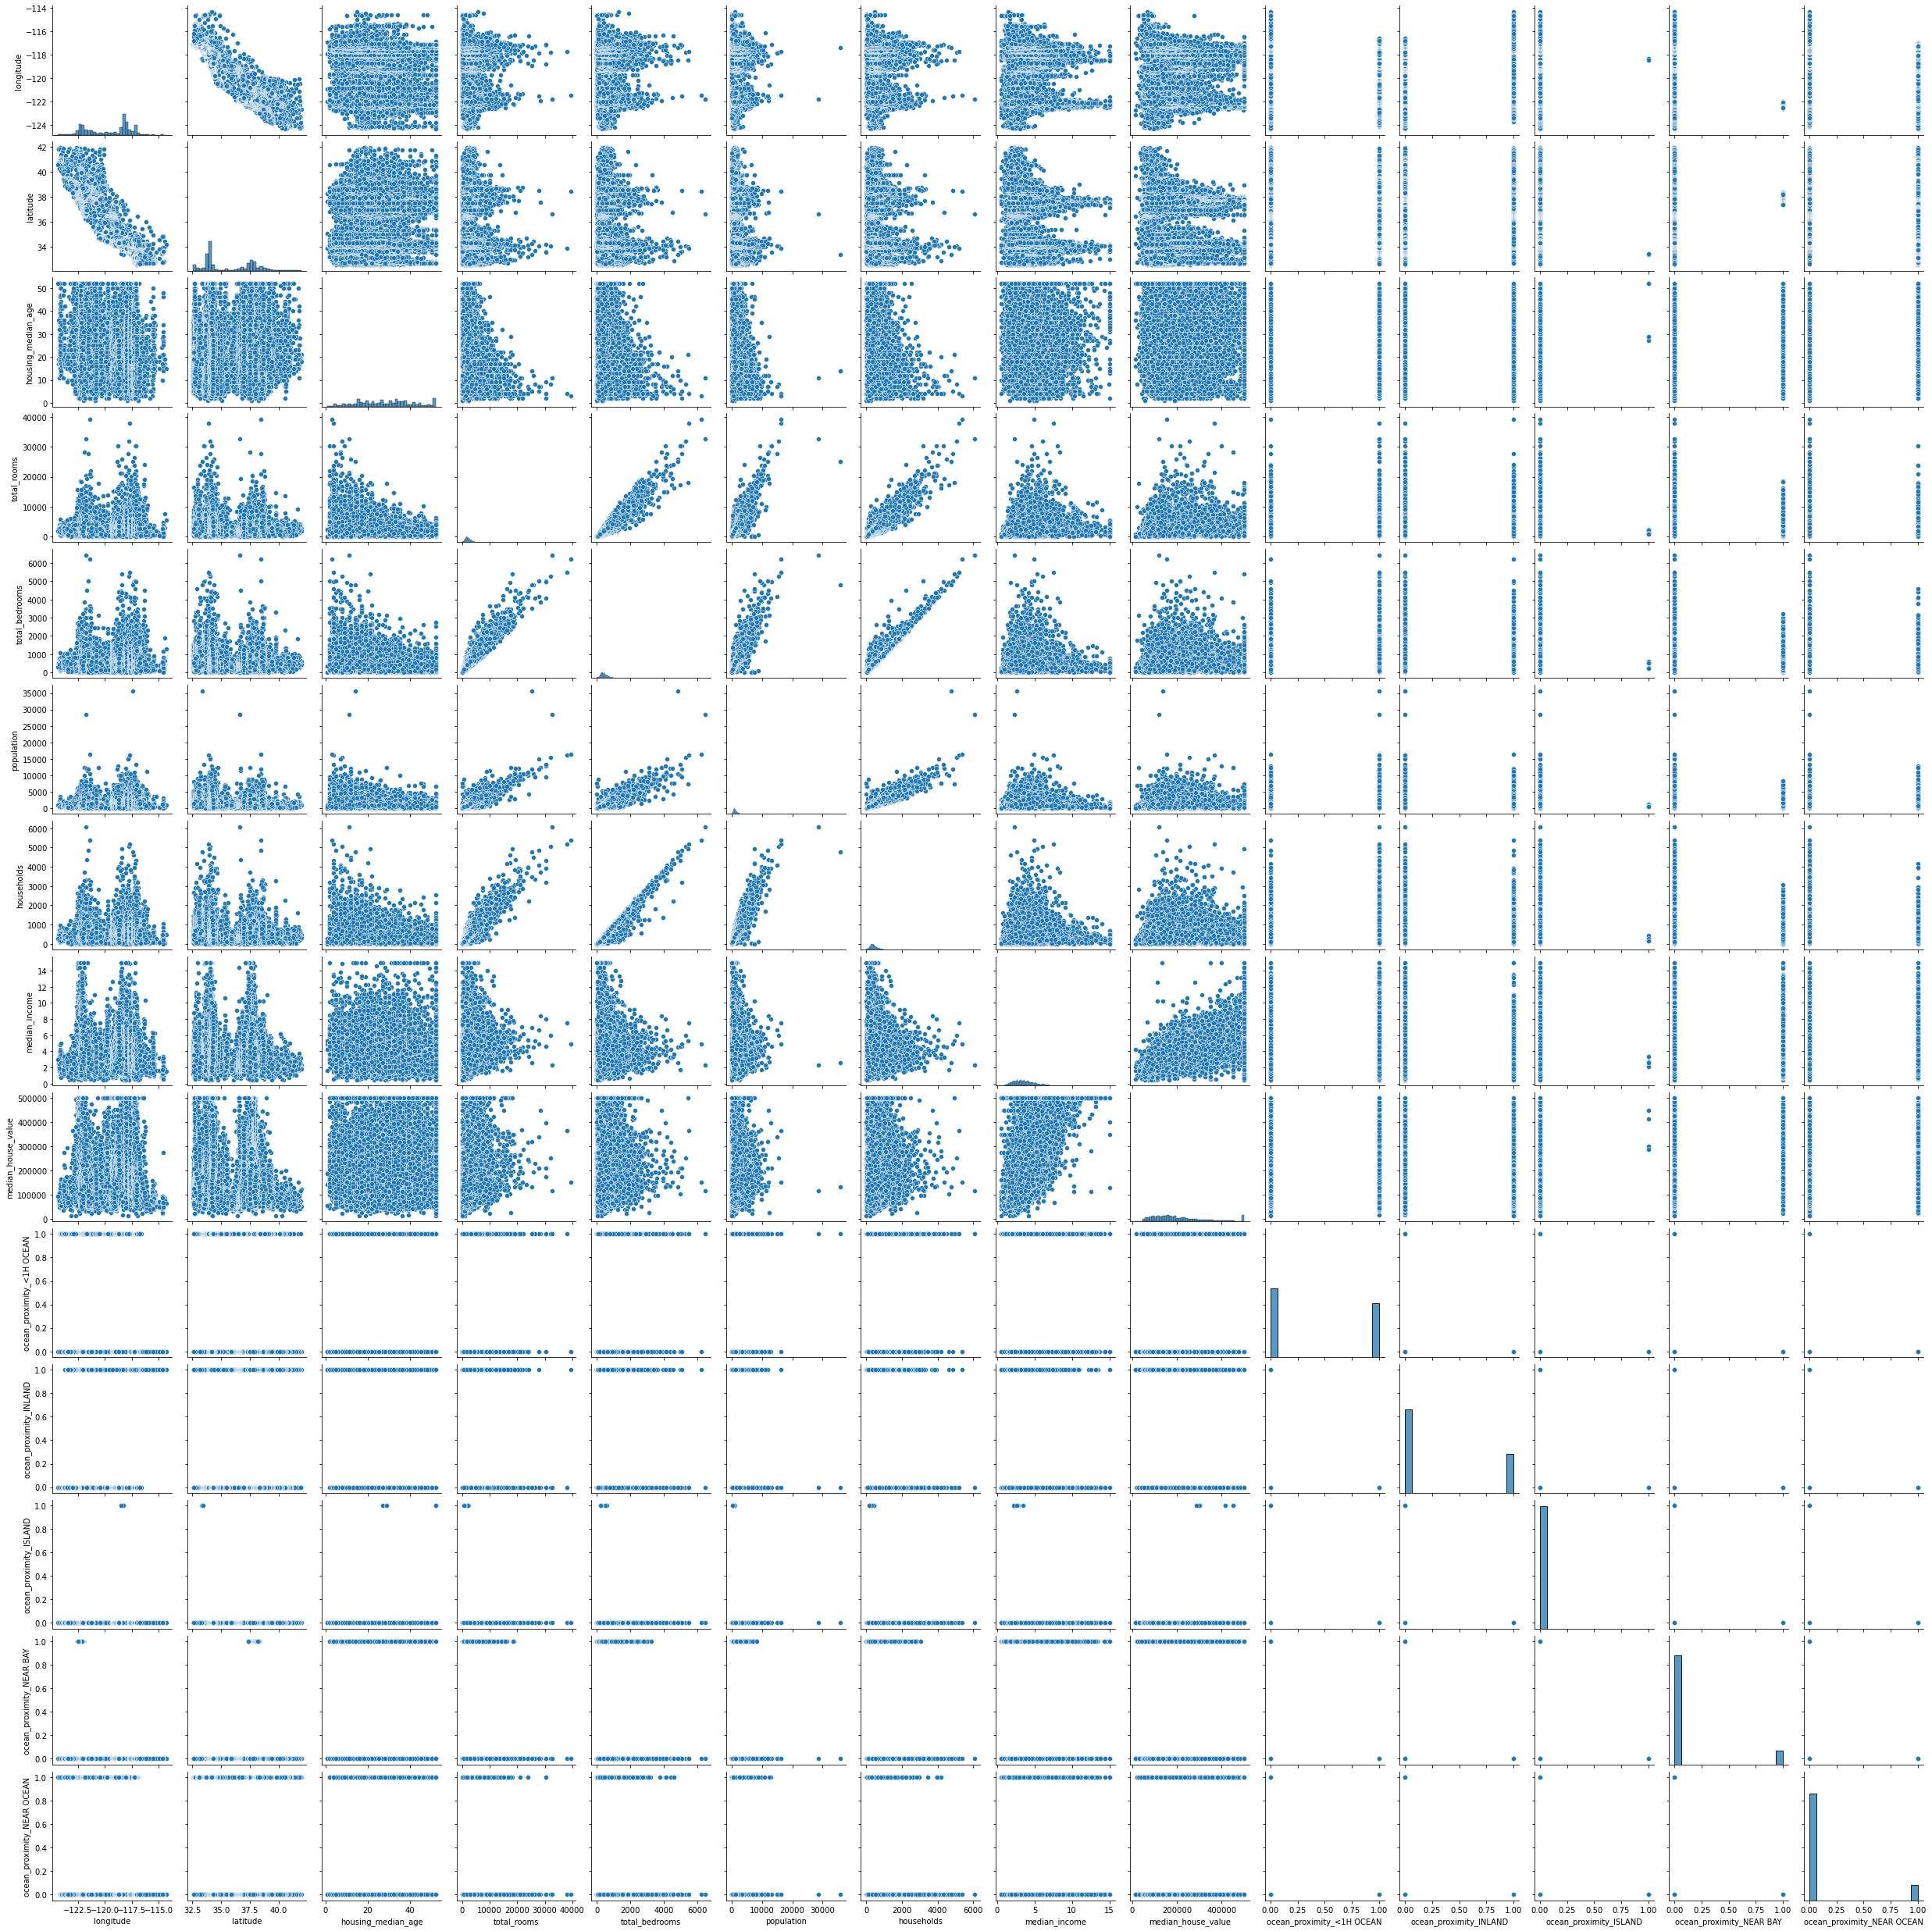

In [39]:
sns.pairplot(df_dummies)

Only obvious possible linear relationship with median house value is median income. Linear regression is not a viable option. Will try other classifiers.
Going to use random forest classifiers, no need to preprocess data

In [43]:
Y = df_dummies['median_house_value']
X = df_dummies.drop(labels='median_house_value', axis = 1)

In [47]:
## Splitting up data into training, validation, and testing data. 60/20/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)

In [52]:
X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size=0.5)

In [61]:
## First model will be random forest regressor
## First use gridsearch to find best parameters

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import max_error, r2_score

In [63]:
params_rf = {
    'n_estimators':[50,75,125],
    'max_depth':[3,6,None],
    'min_samples_split':[2,3],
    'max_features':[4,6]
    }

scoring = ('max_error', 'r2')

In [65]:
rf = RandomForestRegressor(random_state=5)
rf_cv = GridSearchCV(rf, param_grid=params_rf, cv = 5, scoring=scoring,refit='r2')

In [69]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=5),
             param_grid={'max_depth': [3, 6, None], 'max_features': [4, 6],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 75, 125]},
             refit='r2', scoring=('max_error', 'r2'))

In [70]:
rf_cv.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=125, random_state=5)

In [71]:
rf_cv.best_score_

0.809573320643534

In [72]:
y_pred = rf_cv.predict(X_val)

In [1]:
sns.scatterplot(x= y_pred, y=y_val)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values(Rf)')
plt.show()

NameError: name 'sns' is not defined

In [87]:
r2 = r2_score(y_val,y_pred)

In [121]:
validation_table = pd.DataFrame()

In [122]:
Random_forest_regressor = {'Model':'RandomForestRegressor','r2': r2}

validation_table = validation_table.append(Random_forest_regressor, ignore_index=True)


In [96]:
validation_table

,Model,r2
0,RandomForestRegressor,0.810541


Now trying svm regressor, first need to normalize data

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_normal = scaler.fit_transform(X_train)

X_val_normal = scaler.fit_transform(X_val)


In [102]:
from sklearn.svm import SVR

svm_params = {
    'kernel':['linear','poly','sigmoid'],
    'degree':[3,4,5],
}
svm = SVR()
svm_cv = GridSearchCV(svm,param_grid=svm_params,scoring=scoring,cv=5,refit='r2')

In [104]:
svm_cv.fit(X_train_normal,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             refit='r2', scoring=('max_error', 'r2'))

In [106]:
svm_cv.best_params_

{'degree': 3, 'kernel': 'linear'}

In [107]:
svm_cv.best_score_

0.05529052338590519

In [114]:
y_pred_svm = svm_cv.predict(X_val_normal)

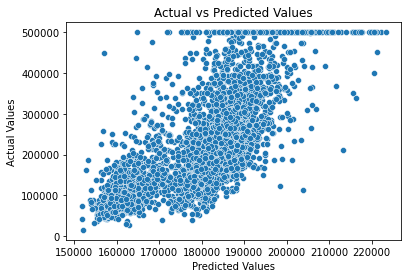

In [115]:
sns.scatterplot(x= y_pred_svm, y=y_val)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [123]:
r2_svm = r2_score(y_val,y_pred_svm)
SVM_regressor = {'Model':'SVMRegressor','r2': r2_svm}

validation_table = validation_table.append(SVM_regressor, ignore_index=True)

In [124]:
validation_table

,Model,r2
0,RandomForestRegressor,0.810541
1,SVMRegressor,0.076776


SVM Regressor not effective

In [126]:
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    'learning_rate':[0.1,0.3,0.5],
    'n_estimators':[75,100,200],
    'subsample':[0.5,0.75,1.0],
    'min_samples_split':[2,3,5],
}
gb = GradientBoostingRegressor()
gb_cv = GridSearchCV(gb,param_grid=gb_params,scoring=scoring,cv=5,refit='r2')

In [127]:
gb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [75, 100, 200],
                         'subsample': [0.5, 0.75, 1.0]},
             refit='r2', scoring=('max_error', 'r2'))

In [128]:
gb_cv.best_params_

{'learning_rate': 0.3,
 'min_samples_split': 3,
 'n_estimators': 200,
 'subsample': 1.0}

In [129]:
gb_cv.best_score_

0.8099260579842472

In [131]:
y_pred_gb = gb_cv.predict(X_val)

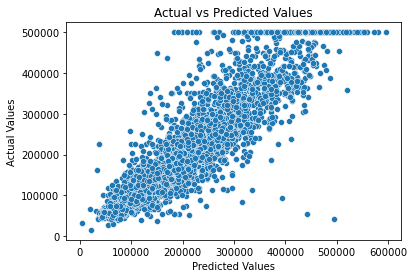

In [132]:
sns.scatterplot(x= y_pred_gb, y=y_val)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [133]:
r2_gb = r2_score(y_val,y_pred_gb)
gb_regressor = {'Model':'Gradien Boosting Regressor','r2': r2_gb}

validation_table = validation_table.append(gb_regressor, ignore_index=True)

In [134]:
validation_table

,Model,r2
0,RandomForestRegressor,0.810541
1,SVMRegressor,0.076776
2,Gradien Boosting Regressor,0.806554


Of the models tested, random forest regressor has the best r2 score.
Will now test on testing data and create evaluation visualizations

In [135]:
y_pred_rf_test = rf_cv.predict(X_test)

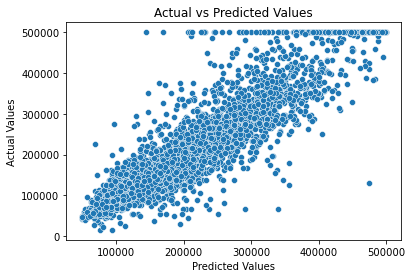

In [136]:
sns.scatterplot(x= y_pred_rf_test, y=y_test)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [138]:
r2_rf_final = r2_score(y_test,y_pred_rf_test)
r2_rf_final

0.818056224147396

In [139]:
final_regressor = {'Model':'Random Forest on Test Data','r2': r2_rf_final}

validation_table = validation_table.append(final_regressor, ignore_index=True)

In [140]:
validation_table

,Model,r2
0,RandomForestRegressor,0.810541
1,SVMRegressor,0.076776
2,Gradien Boosting Regressor,0.806554
3,Random Forest on Test Data,0.818056


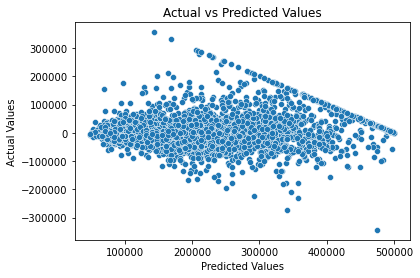

In [142]:
residuals = y_test - y_pred_rf_test
sns.scatterplot(x= y_pred_rf_test, y=residuals)
plt.ylabel('Residuals')
plt.xlabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

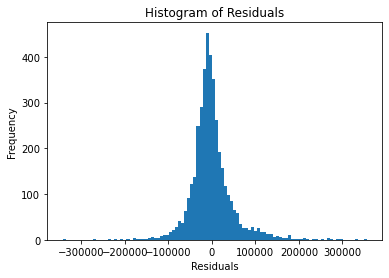

In [144]:
plt.hist(residuals, bins=100)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [150]:
best_model = rf_cv.best_estimator_

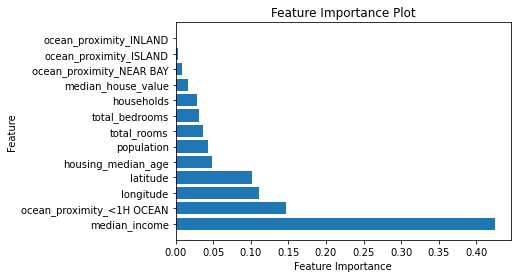

In [152]:
feature_importances = best_model.feature_importances_

feature_names = df_dummies.columns

sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

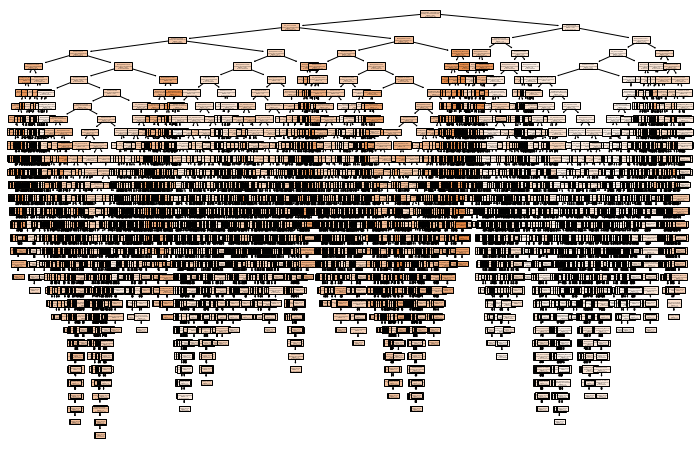

In [154]:
from sklearn import tree

estimator = best_model.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(estimator, feature_names=feature_names, filled=True)
plt.show()